## Libraries

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

## Data Loading

In [3]:
df_scores = pd.read_csv("./../datasets/score_students.csv")

In [4]:
df_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [5]:
df_scores.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


In [6]:
df_scores.tail(10)

,horas_estudo,pontuacao_teste
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


## EDA

In [7]:
df_scores.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

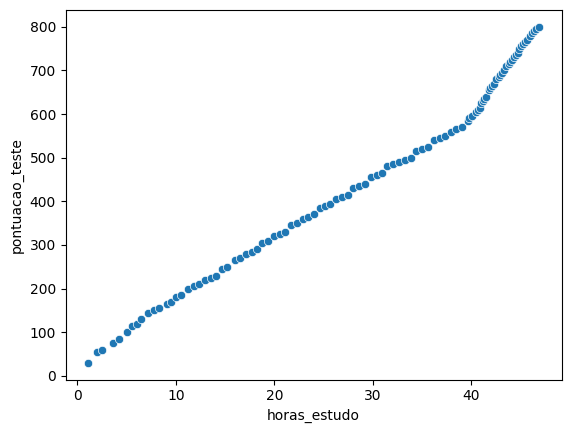

In [8]:
sns.scatterplot(data=df_scores, x="horas_estudo", y="pontuacao_teste")

<Axes: ylabel='horas_estudo'>

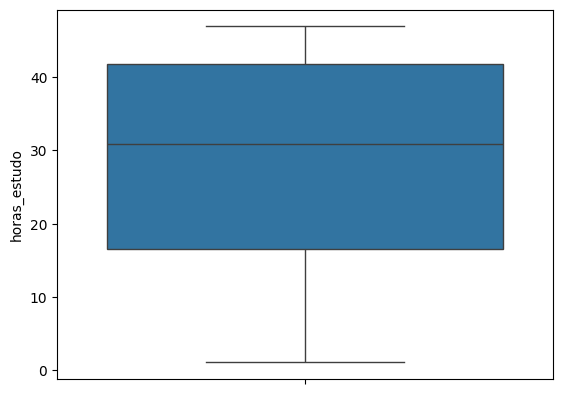

In [9]:
sns.boxplot(df_scores, y="horas_estudo")

<Axes: >

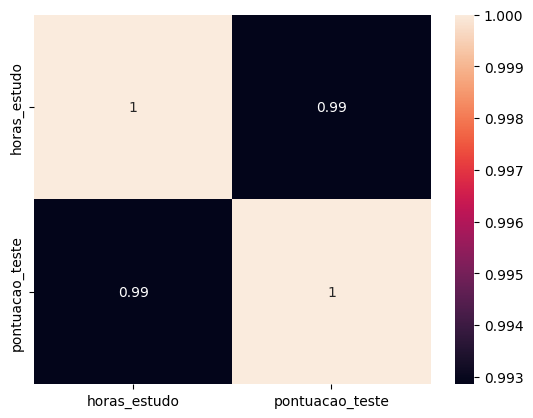

In [10]:
sns.heatmap(df_scores.corr("pearson"), annot=True)

<Axes: >

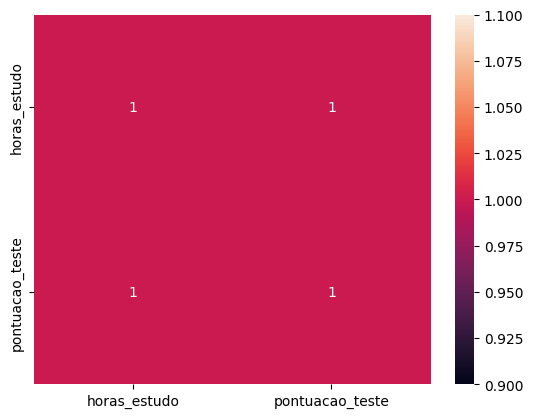

In [11]:
sns.heatmap(df_scores.corr("spearman"), annot=True)

## Training the model

In [12]:
X = df_scores["horas_estudo"].values.reshape(-1, 1)
y = df_scores["pontuacao_teste"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [13]:
reg_model = LinearRegression()

In [14]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [15]:
print(f"A equação da reta é y = {reg_model.coef_[0][0]:.2f}x + {reg_model.intercept_[0]:.2f}")

A equação da reta é y = 15.64x + 8.48


## Model Validation

In [16]:
y_pred = reg_model.predict(X_test)

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [18]:
r2_score(y_test, y_pred)

0.9828400452912442

In [19]:
mean_absolute_error(y_test, y_pred)

np.float64(22.957470277134608)

In [20]:
mean_squared_error(y_test, y_pred)

np.float64(766.9972992416427)

In [21]:
root_mean_squared_error(y_test, y_pred)

np.float64(27.69471608884342)

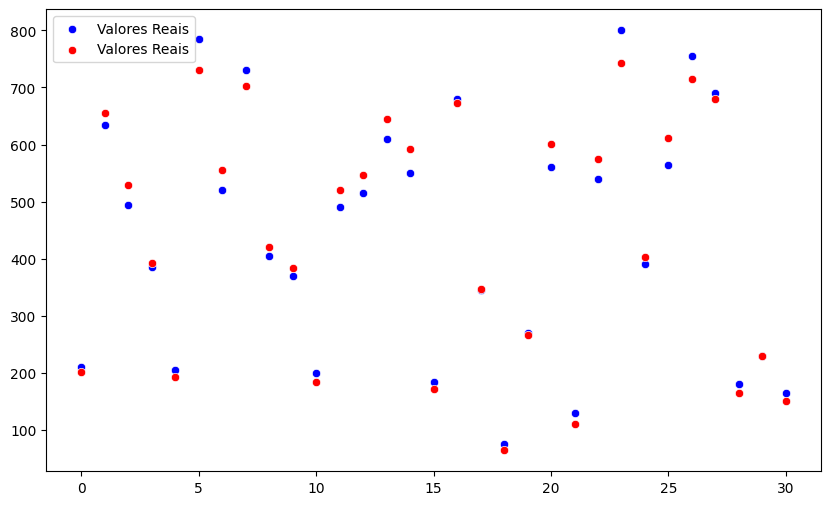

In [22]:
x_axis = range(len(X_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color="blue", label="Valores Reais")
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color="red", label="Valores Reais")
plt.legend()
plt.show()

## Análise de Resíduos

### Calcular resíduos padronizado (Standardization)

Para cada elemento de um conjunto (X - media) / desvio_padrao

In [23]:
residuos = y_test - y_pred

In [25]:
from scipy.stats import zscore
residuos_std = zscore(residuos)

### Verificar a linearidade do modelo

Se os resíduos estiverem entre -2 e +2 (na escala padrão) - indica linearidade

### Verificar homogeneidade das variâncias (Homocedasticidade)

Se valores estiverem em torno da reta, temos homocedasticidade, caso contrário se tivermos alguma tendência ou padrão (formam um cone, funil), há heterocedasticidade

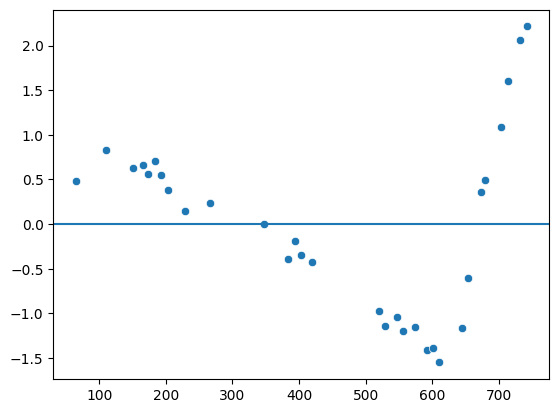

In [28]:
sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

### Verificar se os resíduos seguem uma distribuição normal

QQ (Quantile-Quantile) Plot, que avalia se uma amostra segue uma distribuição normal.

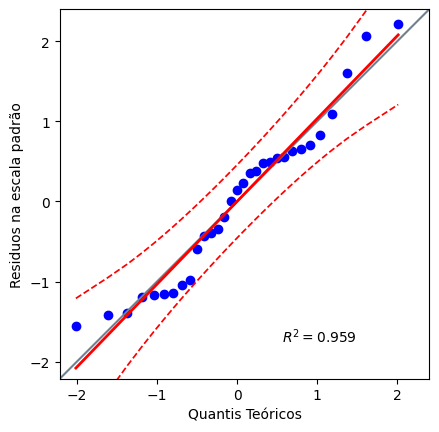

In [29]:
import pingouin as pg

pg.qqplot(residuos_std, dist="norm", confidence=0.95)
plt.xlabel("Quantis Teóricos")
plt.ylabel("Residuos na escala padrão")
plt.show()

### Teste de normalidade Shapiro Wilk

- H0: Segue uma distribuição normal
- H1: Não segue uma distribuição normal

Se o p-valor > 0.05, não rejeitamos a hipótese nula. Caso contrário, rejeitamos.

In [30]:
stat_shapiro, p_value_shapiro = shapiro(residuos.reshape(-1))
print(f"Estatística do teste: {stat_shapiro}")
print(f"p valor: {p_value_shapiro}")

Estatística do teste: 0.9500532226161755
p valor: 0.15663817850304637


### Teste de normalidade Kolmogorov-Smirnov

- H0: Segue uma distribuição normal
- H1: Não segue uma distribuição normal

Se o p-valor > 0.05, não rejeitamos a hipótese nula. Caso contrário, rejeitamos.

In [32]:
stat_ks, p_value_ks = kstest(residuos.reshape(-1), "norm")
print(f"Estatística do teste: {stat_ks}")
print(f"p valor: {p_value_ks}")

Estatística do teste: 0.48355808450512827
p valor: 3.395368995814077e-07


## Salvando o modelo

In [33]:
import joblib

joblib.dump(reg_model, "./../models/reg_model.pkl")

['./../models/reg_model.pkl']